<a href="https://colab.research.google.com/github/huynhhoc/DataAnalystDeepLearning/blob/main/Labs/Lab02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import sys
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def load_data(filename):
  return pd.read_csv('https://raw.githubusercontent.com/huynhhoc/DataAnalystDeepLearning/main/Data/covid19/'+filename)
dfcovid19 = load_data('countriessample.csv')
dfcovid19.head()

,Date,CountryRegion,Confirmed,Recovered,Deaths
0,1/22/2020,Ghana;Africa,NaN,NaN,0.0
1,1/22/2020,Greece;Europe,NaN,NaN,0.0
2,1/22/2020,Iceland;Europe,0.0,NaN,0.0
3,1/22/2020,India;Asia,0.0,NaN,0.0
4,1/22/2020,Indonesia;Asia,0.0,NaN,0.0


# Heatmap

The **heatmap** is a way of representing the data in a 2-dimensional form. The data values are represented as colors in the graph. The goal of the heatmap is to provide a colored visual summary of information.

**Example 1**:

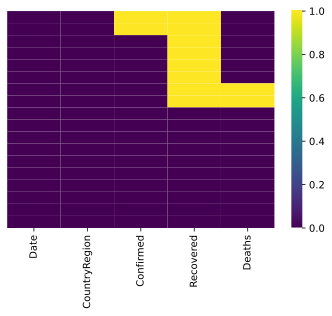

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.heatmap(dfcovid19.isna(), 
            yticklabels=False, 
            cbar=True, 
            cmap='viridis')

# Apply function
Syntax:
DataFrame.apply(func, axis=0, raw=False, result_type=None, args=(), **kwargs)
(Details: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html#pandas.DataFrame.apply)

Apply a function along an axis of the DataFrame.

Objects passed to the function are Series objects whose index is either the DataFrame’s index (**axis=0**) or the DataFrame’s columns (axis=1). By default (result_type=None), the final return type is inferred from the return type of the applied function. Otherwise, it depends on the result_type argument.

**Example 2**:Apply a function to each column of the dataframe
(source: https://datascienceparichay.com/article/apply-a-function-to-a-pandas-dataframe/)

In [4]:
import pandas as pd

# create a sample dataframe
df = pd.DataFrame({
    'History': [76, 84, 68, 94],
    'Math': [81, 67, 91, 86],
    'English': [72, 93, 84, 76]
})

# print the dataframe
print("The original dataframe:\n")
print(df)

# function to be applied
def get_mean(scores):
    return sum(scores)/len(scores)

# get the mean score for each subject
result = df.apply(get_mean)
print("\nThe result of applying the function on the dataframe:\n")
print(result)

The original dataframe:

   History  Math  English
0       76    81       72
1       84    67       93
2       68    91       84
3       94    86       76

The result of applying the function on the dataframe:

History    80.50
Math       81.25
English    81.25
dtype: float64


**Example 3**: Apply a function to each row **(axis = 1)** of the dataframe

In [5]:
import pandas as pd

# create a sample dataframe
df = pd.DataFrame({
    'History': [76, 84, 68, 94],
    'Math': [81, 67, 91, 86],
    'English': [72, 93, 84, 76]
}, index=['Sam', 'Greta', 'Mike', 'Emma'])

# print the dataframe
print("The original dataframe:\n")
print(df)

# function to be applied
def get_mean(scores):
    return sum(scores)/len(scores)

# get the mean score for each student
result = df.apply(get_mean, axis=1)
print("\nThe result of applying the function on the dataframe:\n")
print(result)

The original dataframe:

       History  Math  English
Sam         76    81       72
Greta       84    67       93
Mike        68    91       84
Emma        94    86       76

The result of applying the function on the dataframe:

Sam      76.333333
Greta    81.333333
Mike     81.000000
Emma     85.333333
dtype: float64


**Example 4**: Define function to split CountryRegion into country and region

In [6]:
def split_name_series(string):
  country, region=string.split(';')
  return pd.Series(
      (country, region),
      index='country, region'.split()
  )

In [7]:

def split_name(x_df):
    # Select the Name column and apply a function
    res=x_df['CountryRegion'].apply(split_name_series)
    x_df[res.columns]=res
    return x_df

# pipe() function
Syntax:

DataFrame.pipe(func, *args, **kwargs)

(source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pipe.html)

**Parameters**
func: function

> Function to apply to the Series/DataFrame. args, and kwargs are passed into func. Alternatively a (callable, data_keyword) tuple where data_keyword is a string indicating the keyword of callable that expects the Series/DataFrame.



args: iterable, optional

> Positional arguments passed into func.

kwargs: mapping, optional

> A dictionary of keyword arguments passed into func.

Returns

> objectthe return type of func.




**Example 5**: Split CountryRegion into country and region by using slip_name function in example 4

In [8]:
res=load_data('countriessample.csv').pipe(split_name)
res

,Date,CountryRegion,Confirmed,Recovered,Deaths,"country,",region
0,1/22/2020,Ghana;Africa,NaN,NaN,0.0,Ghana,Africa
1,1/22/2020,Greece;Europe,NaN,NaN,0.0,Greece,Europe
2,1/22/2020,Iceland;Europe,0.0,NaN,0.0,Iceland,Europe
3,1/22/2020,India;Asia,0.0,NaN,0.0,India,Asia
4,1/22/2020,Indonesia;Asia,0.0,NaN,0.0,Indonesia,Asia
5,1/22/2020,Iran;Asia,0.0,NaN,0.0,Iran,Asia
6,1/22/2020,Iraq;Asia,0.0,NaN,NaN,Iraq,Asia
7,1/22/2020,Ireland;Europe,0.0,NaN,NaN,Ireland,Europe
8,6/6/2020,Guinea;Africa,4117.0,2857.0,23.0,Guinea,Africa
9,6/6/2020,Guyana;South America,154.0,80.0,12.0,Guyana,South America


#  map() function
 map() used for substituting each value in a Series with another value

**Example 6**:

In [9]:
def substitute_region(x_df):
    mapping={'Africa':'AF', 'Asia':'AS','Europe':'EU','South America':'SA','North America':'NA'}
    x_df['region']=x_df['region'].map(mapping)
    return x_df

In [10]:
res=(res.pipe(substitute_region))
res

,Date,CountryRegion,Confirmed,Recovered,Deaths,"country,",region
0,1/22/2020,Ghana;Africa,NaN,NaN,0.0,Ghana,AF
1,1/22/2020,Greece;Europe,NaN,NaN,0.0,Greece,EU
2,1/22/2020,Iceland;Europe,0.0,NaN,0.0,Iceland,EU
3,1/22/2020,India;Asia,0.0,NaN,0.0,India,AS
4,1/22/2020,Indonesia;Asia,0.0,NaN,0.0,Indonesia,AS
5,1/22/2020,Iran;Asia,0.0,NaN,0.0,Iran,AS
6,1/22/2020,Iraq;Asia,0.0,NaN,NaN,Iraq,AS
7,1/22/2020,Ireland;Europe,0.0,NaN,NaN,Ireland,EU
8,6/6/2020,Guinea;Africa,4117.0,2857.0,23.0,Guinea,AF
9,6/6/2020,Guyana;South America,154.0,80.0,12.0,Guyana,SA


# pandas.cut
**Syntax**:
pandas.cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False, duplicates='raise', ordered=True)

See details at the link: https://pandas.pydata.org/docs/reference/api/pandas.cut.html#

Bin values into discrete intervals.

Use cut when you need to segment and sort data values into bins. This function is also useful for going from a continuous variable to a categorical variable. For example, cut could convert ages to groups of age ranges. Supports binning into an equal number of bins, or a pre-specified array of bins

**Example 7**: Discretize into three equal-sized bins

In [11]:
import pandas as pd
import numpy as np
a = pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3)

In [12]:
a

[(0.994, 3.0], (5.0, 7.0], (3.0, 5.0], (3.0, 5.0], (5.0, 7.0], (0.994, 3.0]]
Categories (3, interval[float64]): [(0.994, 3.0] < (3.0, 5.0] < (5.0, 7.0]]

**Example 8**:Discovers the same bins, but assign them specific labels. Notice that the returned Categorical’s categories are labels and is ordered

In [13]:
import pandas as pd
import numpy as np
pd.cut(np.array([1, 7, 5, 4, 6, 3]),bins = 3, labels=["bad", "medium", "good"])

['bad', 'good', 'medium', 'medium', 'good', 'bad']
Categories (3, object): ['bad' < 'medium' < 'good']

**Example 9**: ordered=False will result in unordered categories when labels are passed. This parameter can be used to allow non-unique labels:

In [14]:
import pandas as pd
import numpy as np
pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3,labels=["B", "A", "B"], ordered=False)

['B', 'B', 'A', 'A', 'B', 'B']
Categories (2, object): ['A', 'B']

**Example 10**: Convert confirmed cases into 3 catorories: normal (<3000), medium ( <5000), and worst (>5000)

In [15]:
def create_evaluation_group(x_df):
    bins=[0.0, 3000, 5000, sys.maxsize]
    labels=['normal', 'medium', 'worst']
    evaluationGroup=pd.cut(x_df['Confirmed'], bins=bins, labels=labels,include_lowest=True)
    x_df['Evaluation']=evaluationGroup
    return x_df

In [16]:
res=(res.pipe(create_evaluation_group))
res

,Date,CountryRegion,Confirmed,Recovered,Deaths,"country,",region,Evaluation
0,1/22/2020,Ghana;Africa,NaN,NaN,0.0,Ghana,AF,NaN
1,1/22/2020,Greece;Europe,NaN,NaN,0.0,Greece,EU,NaN
2,1/22/2020,Iceland;Europe,0.0,NaN,0.0,Iceland,EU,normal
3,1/22/2020,India;Asia,0.0,NaN,0.0,India,AS,normal
4,1/22/2020,Indonesia;Asia,0.0,NaN,0.0,Indonesia,AS,normal
5,1/22/2020,Iran;Asia,0.0,NaN,0.0,Iran,AS,normal
6,1/22/2020,Iraq;Asia,0.0,NaN,NaN,Iraq,AS,normal
7,1/22/2020,Ireland;Europe,0.0,NaN,NaN,Ireland,EU,normal
8,6/6/2020,Guinea;Africa,4117.0,2857.0,23.0,Guinea,AF,medium
9,6/6/2020,Guyana;South America,154.0,80.0,12.0,Guyana,SA,normal


# Homework
Dataset description: The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew. While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.
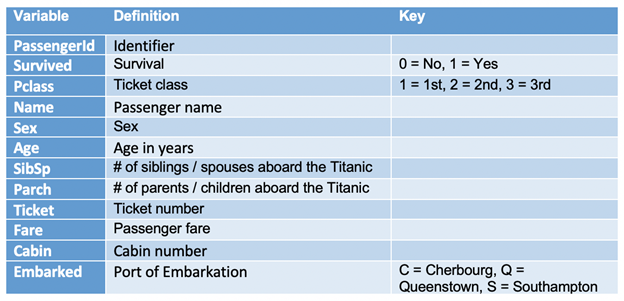

Yêu cầu: Hãy chuẩn bị dữ liệu phục vụ cho bài toán: “Xây dựng mô hình dự báo nhóm hành khách có khả năng sống sót với các thông số đầu vào là các đặc trưng của hành khách (name, age, gender, socio-economic class, …), trong sự kiện Titanic lịch sử”

**PHẦN 1: DATA CLEANSING & FEATURE ENGINEERING**

**Hướng dẫn**
1.	Viết hàm load_data() để tải dữ liệu lên ứng dụng. Sau đó, hiển thị ra màn hình 10 dòng đầu tiên.
2.	Thống kê dữ liệu thiếu trên các biến số và trực quan hóa dữ liệu thiếu bằng biểu đồ (Heat map). Hãy cho nhận xét về tình trạng thiếu dữ liệu Age, Cabin và Embarked
3.	Xử lý tên cột tên Name, tách ra làm 2 cột: firstName và secondName. Lưu ý: Sau khi tách cột xong thì xóa luôn cột Name
4.	Xứ lý rút gọn kích thước dữ liệu trên cột Sex như sau: thay thế male -> M và female -> F
5.	Xử lý dữ liệu thiếu trên biến Age bằng cách thay thế bằng giá trị trung bình tuổi: Hãy đưa ra quyết định dùng giá trị trung bình tuổi toàn bộ hành khách hay theo từng nhóm hạng vé (hạng hành khách: Pclass). Ta tiến hành làm các bước sau
a.	Sử dụng Seaborn để vẽ biểu đồ (Box plot) trực quan dữ liệu để xác định phân phối tuổi trên từng hạng hành khách. Nhận xét về tuổi trung bình giữa các nhóm hành khách. Từ đó đưa ra quyết định cách thay thế giá trị tuổi bị thiếu.
b.	Tiến hành thay thế giá trị Age bị thiếu. Sau đó, hiển thị kết quả dạng bảng và trực quan dữ liệu đã xử lý thiếu cho cột’Age’ bằng biểu đồ Heat map.
6.	Xây dựng biến số Agegroup có thang đo thứ tự được ánh xạ theo thang đo khoảng dựa trên độ tuổi của hành khách như sau: Kid(age =< 12]; Teen(12, 18], Adult(18, 60] và Older( age > 60)
7.	Tiến hành thêm đặc trưng về danh xưng (namePrefix) trong xã hội bằng cách tách Mr, Mrs, Miss, Master ra khỏi “secondName”
8.	Khai thác thêm thông tin số lượng thành viên đi theo nhóm thân quen (familySize) đối với mỗi hành khách trên chuyến hải trình; family size = 1+ SibSp + Parch
9.	Tạo thêm đặc trưng ‘Alone’ để xác định hành khách đi theo nhóm hay cá nhân bằng cách dựa trên familySize như sau: Nếu familySize = 0 thì giá trị Alone = 1 và ngược lại là 0.
10.	Tiến hành tách loại cabin (typeCabin) mà hành khách ở để lọc và phân tích đặc tính cabin. Loại cabin được kí hiệu bởi chữ cái đầu tiên. Lưu ý: Đối với dữ liệu cabin bị thiếu thì thay thế bằng “Unknown”
11.	Loại bỏ dữ liệu thừa đối với các hành khách xuất hiện trong cả 2 tập dữ liệu huấn luyện (train.csv) và đánh giá (test.csv). Ưu tiên giữ lại dữ liệu trong tập huấn luyện.


**PHẦN 2: KHAI THÁC THÔNG TIN HỮU ÍCH – EDA**

**Hướng dẫn**: Sinh viên cần đưa ra nhận xét sau mỗi biểu đồ trực quan nhằm rút trích được thông tin có giá trị về hành khách sống sót dựa trên các đặc trưng bên trên

12.	Trực quan thông tin tương quan tỉ lệ sống sót và thiệt mạng trên từng nhóm giới tính.
13.	Trực quan thông tin hành khách sống sót trên từng nhóm phân loại hành khách (Pclass).
14.	Trực quan thông tin hành khách sống sót trên từng nhóm giới tính và thang đo tuổi tác
15.	Trực quan xác suất hành khách sống sót dựa trên thông tin nhóm đi cùng
16.	Trực quan xác suất hành khách sống sót dựa trên thông tin giá vé
17.	Trực quan số lượng người thiệt mạng và sống sót theo phân lớp (Pclass) hành khách và cảng sẽ cập bến.


**Nguồn hữu ích**:
1. https://towardsdatascience.com/using-pandas-pipe-function-to-improve-code-readability-96d66abfaf8 
2. https://www.kaggle.com/startupsci/titanic-data-science-solutions
3. https://github.com/leoninekev/Kaggle-beginner-Titanic-solution/blob/master/titanic_doc_a.ipynb
4. https://keytodatascience.com/machine-learning-titanic-disaster-problem/ 
